In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit

In [2]:
# define functions
def LinearFunc(t, a, b):
    return a * t + b

def ChiSqrd(Data, Fit, Error):
    return sum( ((Data - Fit) / Error)**2 )

def RdChiSqrd(Data, Fit, Error, NumPrams):
    return sum( ((Data - Fit) / Error)**2 ) / (np.size(Data) - NumPrams - 2)

def GuessFunc(x, a, b, A, h):
    return A*(1 - a*(x - b) / np.sqrt((a*(x - b))**2 + 1)) + h

def GuessFunc2(x, A, c, b, h):
    return A*np.tanh((x-b)/c) + h

def WeightedAverageError(Err):
    return np.sqrt( 1/( sum( 1/(Err)**2 ) ) )

def WeightedAverage(Val, Err):
    return ( sum( Val/(Err)**2 ) )/( sum( 1/(Err)**2 ) )

## BaTiO3
### Importing Data and Error Determination

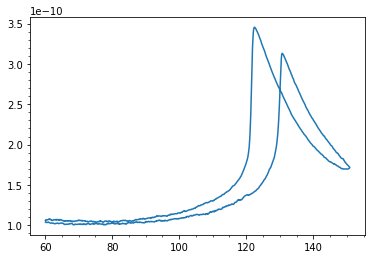

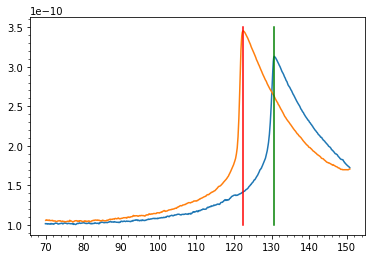

Rising Temp TC = 130.69600000000003
Falling Temp TC = 122.43399999999997


In [198]:
# Importing and formatting data
# Reading Files
Data = pd.read_csv("Data/BaTiO3_CSV.CSV")

#Seperating Data
x = pd.DataFrame(Data, columns= ['Col1'])
y = pd.DataFrame(Data, columns= ['Col4'])

#Formatting Data
x = np.resize(x,(1544,1)) + 273
y = np.resize(y,(1544,1))

TStartIndex = 74
TCutIndex = 766
TEndIndex = 1424

#print(np.where(x < 70))
#print(np.where(x == max(x)))

#Resizing and cutting
y = -(y/(25000*1000)) #internal resistnace from manual is 1kOhm frequency is 25kHz

xF = x[0:1512,0]
yF = y[0:1512,0]

x1 = x[TStartIndex:TCutIndex,0]
y1 = y[TStartIndex:TCutIndex,0]

x2 = x[(TCutIndex+1):TEndIndex,0]
y2 = y[(TCutIndex+1):TEndIndex,0]

#print(np.where(y1 == max(y1)))
#print(np.where(y2 == max(y2)))

plt.plot(xF-273, yF)
plt.minorticks_on()
plt.show()

plt.plot(x1-273, y1)
plt.plot(x2-273, y2)
plt.plot([x1[528]-273, x1[528]-273],[10**(-10),3.5*10**(-10)],color='g')
plt.plot([x2[211]-273, x2[211]-273],[10**(-10),3.5*10**(-10)],color='r')
plt.minorticks_on()
plt.show()

TC1index = 528
TC2index = 211
TC1 = x1[TC1index]
TC2 = x2[TC2index]

print("Rising Temp TC = " + str(TC1-273))
print("Falling Temp TC = " + str(TC2-273))

#Error will come mostly from how certan we are of measured temp value

### Rising Temp

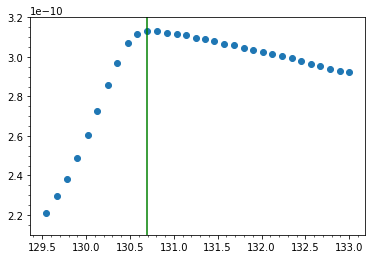

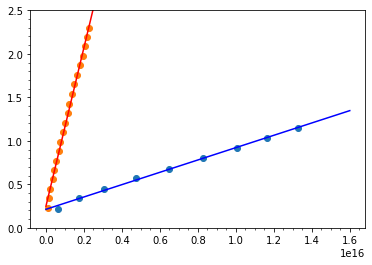


CWLow [K] = 124803.54361947936 +/- 2761.31248886
CWHigh [K] = 9711.77162618368 +/- 166.6251882404304
Ratio(L/H) = 12.850749422793205 +/- 0.3597960843984747


In [199]:
Floor = 2.2*10**(-10)
MaxT = 133+273
TC = TC1
CNot = 10**(7)
eNot = 8.85*10**(-12)
offset = 0.2

x = x1
y = y1

x = x[(np.where(y > Floor )[0])]
y = y[(np.where(y > Floor )[0])]

x = x[(np.where(x < MaxT )[0])]
y = y[(np.where(x < MaxT )[0])]

#print(np.where(y == max(y))[0])
TCindex = (np.where(y == max(y))[0])

xLow = x[(np.where(x < TC - offset )[0])]
yLow = y[(np.where(x < TC - offset)[0])]
xHigh = x[(np.where(x > TC + offset)[0])]
yHigh = y[(np.where(x > TC + offset)[0])]

kLow = (yLow * y[TCindex])/(CNot * (y[TCindex] - yLow))
kHigh = (yHigh * y[TCindex])/(CNot * (y[TCindex] - yHigh))

Guess = [120000, 0]
LowParam, LowParam_cov = curve_fit(LinearFunc, (1/kLow), (TC-xLow), Guess, maxfev=150000)
Guess = [10000, 0]
HighParam, HighParam_cov = curve_fit(LinearFunc, (1/kHigh), (xHigh-TC), Guess, maxfev=150000)

LowPltx = np.linspace(0, 1.6*10**(16), 20)
HighPltx = np.linspace(0, 0.5*10**(16), 20)


plt.scatter(x-273, y)
plt.plot([TC-273, TC-273],[(Floor-10**(-11)),3.2*10**(-10)],color='g')
plt.minorticks_on()
plt.ylim([(Floor-10**(-11)),3.2*10**(-10)])
plt.show()

plt.scatter(1/kLow, TC-xLow)
plt.scatter(1/kHigh, xHigh-TC)
plt.plot(LowPltx, LinearFunc(LowPltx, *LowParam), color='b') 
plt.plot(HighPltx, LinearFunc(HighPltx, *HighParam), color='r') 
plt.ylim([0,2.5])
plt.minorticks_on()
plt.show()

CWLow = eNot/LowParam[0]
CWHigh = eNot/HighParam[0]

CWLowError = (eNot * np.sqrt(LowParam_cov[0,0]))/(LowParam[0])**2
CWHighError = (eNot * np.sqrt(HighParam_cov[0,0]))/(HighParam[0])**2

Ratio = HighParam[0]/LowParam[0]
RatioError = np.sqrt( (HighParam_cov[0,0]/LowParam[0]**2) + (HighParam[0]/LowParam[0]**2)**2 *LowParam_cov[0,0] )

#print(LowParam[0])
#print(HighParam[0])
#print(HighParam[0]/LowParam[0])
print("")
print("CWLow [K] = " + str(CWLow) + " +/- " + str(CWLowError))
print("CWHigh [K] = " + str(CWHigh) + " +/- " + str(CWHighError))

print("Ratio(L/H) = " + str(Ratio) + " +/- " + str(RatioError))

CWLow1 = CWLow
CWLow1Error = CWLowError
CWHigh1 = CWHigh
CWHigh1Error = CWHighError
Raito1 = Ratio
Raito1Error = RatioError

### Microscopic Dipole Moment and Effective Atomic Displacement

In [200]:
eNot = 8.85*10**(-12)  #F/m
kb = 1.38*10**(-23)    #J/K
aaa = 6.5723*10**(-29) #m^3
elec = 1.6*10**(-19)   #C

DipMomLow = np.sqrt( eNot * kb * aaa * CWLow )
DipMomHigh = np.sqrt( eNot * kb * aaa * CWHigh )

DipMomLowError = CWLowError * np.sqrt( (1/2) * np.sqrt(eNot * kb * aaa / CWLow) )
DipMomHighError = CWHighError * np.sqrt( (1/2) * np.sqrt(eNot * kb * aaa / CWHigh) )

AtomDispLow = DipMomLow / (6*elec)
AtomDispHigh = DipMomHigh / (6*elec)

AtomDispLowError = DipMomLowError / (6*elec)
AtomDispHighError = DipMomHighError / (6*elec)

print("Dipole moment T>Tc [Cm] = " + str(DipMomHigh) + " +/- " + str(DipMomHighError))
print("Eff Atomic Displacement T>Tc [m] = " + str(AtomDispHigh) + " +/- " + str(AtomDispHighError))
print("")
print("Dipole moment T<Tc [Cm] = " + str(DipMomLow) + " +/- " + str(DipMomLowError))
print("Eff Atomic Displacement T<Tc [m] = " + str(AtomDispLow) + " +/- " + str(AtomDispLowError))

DipMomLow1 = DipMomLow
DipMomHigh1 = DipMomHigh
DipMomLow1Error = DipMomLowError
DipMomHigh1Error = DipMomHighError

AtomDispLow1 = AtomDispLow
AtomDispHigh1 = AtomDispHigh
AtomDispLow1Error = AtomDispLowError
AtomDispHigh1Error = AtomDispHighError

Dipole moment T>Tc [Cm] = 8.829154138611021e-30 +/- 3.5525154382628538e-15
Eff Atomic Displacement T>Tc [m] = 9.197035561053145e-12 +/- 3700.536914857139

Dipole moment T<Tc [Cm] = 3.1650700505670016e-29 +/- 3.1094155360780713e-14
Eff Atomic Displacement T<Tc [m] = 3.296947969340626e-11 +/- 32389.745167479905


### Falling Temp

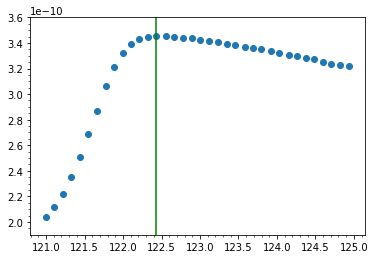

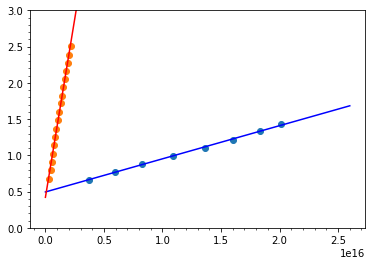


CWLow [K] = 193527.95111336003 +/- 3335.6942948468213
CWHigh [K] = 9002.689164859647 +/- 159.61938676177715
Ratio(L/H) = 21.4966825544484 +/- 0.531558502767517


In [201]:
Floor = 2.0*10**(-10)
MaxT = 125+273
TC = TC2
CNot = 10**(7)
eNot = 8.85*10**(-12)
offset = 0.6

x = np.flip(x2)
y = np.flip(y2)

x = x[(np.where(y > Floor )[0])]
y = y[(np.where(y > Floor )[0])]

x = x[(np.where(x < MaxT )[0])]
y = y[(np.where(x < MaxT )[0])]

#print(np.where(y == max(y))[0])
TCindex = (np.where(y == max(y))[0])

xLow = x[(np.where(x < TC - offset )[0])]
yLow = y[(np.where(x < TC - offset)[0])]
xHigh = x[(np.where(x > TC + offset)[0])]
yHigh = y[(np.where(x > TC + offset)[0])]

kLow = (yLow * y[TCindex])/(CNot * (y[TCindex] - yLow))
kHigh = (yHigh * y[TCindex])/(CNot * (y[TCindex] - yHigh))

Guess = [120000, 0]
LowParam, LowParam_cov = curve_fit(LinearFunc, (1/kLow), (TC-xLow), Guess, maxfev=150000)
Guess = [10000, 0]
HighParam, HighParam_cov = curve_fit(LinearFunc, (1/kHigh), (xHigh-TC), Guess, maxfev=150000)

LowPltx = np.linspace(0, 2.6*10**(16), 20)
HighPltx = np.linspace(0, 0.5*10**(16), 20)


plt.scatter(x-273, y)
plt.plot([TC-273, TC-273],[(Floor-10**(-11)),3.6*10**(-10)],color='g')
plt.minorticks_on()
plt.ylim([(Floor-10**(-11)),3.6*10**(-10)])
plt.show()

plt.scatter(1/kLow, TC-xLow)
plt.scatter(1/kHigh, xHigh-TC)
plt.plot(LowPltx, LinearFunc(LowPltx, *LowParam), color='b') 
plt.plot(HighPltx, LinearFunc(HighPltx, *HighParam), color='r') 
plt.ylim([0,3])
plt.minorticks_on()
plt.show()

CWLow = eNot/LowParam[0]
CWHigh = eNot/HighParam[0]

CWLowError = (eNot * np.sqrt(LowParam_cov[0,0]))/(LowParam[0])**2
CWHighError = (eNot * np.sqrt(HighParam_cov[0,0]))/(HighParam[0])**2

Ratio = HighParam[0]/LowParam[0]
RatioError = np.sqrt( (HighParam_cov[0,0]/LowParam[0]**2) + (HighParam[0]/LowParam[0]**2)**2 *LowParam_cov[0,0] )

#print(LowParam[0])
#print(HighParam[0])
#print(HighParam[0]/LowParam[0])
print("")
print("CWLow [K] = " + str(CWLow) + " +/- " + str(CWLowError))
print("CWHigh [K] = " + str(CWHigh) + " +/- " + str(CWHighError))

print("Ratio(L/H) = " + str(Ratio) + " +/- " + str(RatioError))

CWLow2 = CWLow
CWLow2Error = CWLowError
CWHigh2 = CWHigh
CWHigh2Error = CWHighError
Raito2 = Ratio
Raito2Error = RatioError

### Microscopic Dipole Moment and Effective Atomic Displacement

In [202]:
eNot = 8.85*10**(-12)  #F/m
kb = 1.38*10**(-23)    #J/K
aaa = 6.5723*10**(-29) #m^3
elec = 1.6*10**(-19)   #C

DipMomLow = np.sqrt( eNot * kb * aaa * CWLow )
DipMomHigh = np.sqrt( eNot * kb * aaa * CWHigh )

DipMomLowError = CWLowError * np.sqrt( (1/2) * np.sqrt(eNot * kb * aaa / CWLow) )
DipMomHighError = CWHighError * np.sqrt( (1/2) * np.sqrt(eNot * kb * aaa / CWHigh) )

AtomDispLow = DipMomLow / (6*elec)
AtomDispHigh = DipMomHigh / (6*elec)

AtomDispLowError = DipMomLowError / (6*elec)
AtomDispHighError = DipMomHighError / (6*elec)

print("Dipole moment T>Tc [Cm] = " + str(DipMomHigh) + " +/- " + str(DipMomHighError))
print("Eff Atomic Displacement T>Tc [m] = " + str(AtomDispHigh) + " +/- " + str(AtomDispHighError))
print("")
print("Dipole moment T<Tc [Cm] = " + str(DipMomLow) + " +/- " + str(DipMomLowError))
print("Eff Atomic Displacement T<Tc [m] = " + str(AtomDispLow) + " +/- " + str(AtomDispLowError))

DipMomLow2 = DipMomLow
DipMomHigh2 = DipMomHigh
DipMomLow2Error = DipMomLowError
DipMomHigh2Error = DipMomHighError

AtomDispLow2 = AtomDispLow
AtomDispHigh2 = AtomDispHigh
AtomDispLow2Error = AtomDispLowError
AtomDispHigh2Error = AtomDispHighError



Dipole moment T>Tc [Cm] = 8.500725566915465e-30 +/- 3.4682668930555632e-15
Eff Atomic Displacement T>Tc [m] = 8.854922465536942e-12 +/- 3612.7780135995445

Dipole moment T<Tc [Cm] = 3.941320184486262e-29 +/- 3.366047604276517e-14
Eff Atomic Displacement T<Tc [m] = 4.1055418588398556e-11 +/- 35062.99587788038


In [206]:
print("Rising Temp")
print("Falling Temp")
print("")
print("TC")
print(TC1-273)
print(TC2-273)
print("")
print("CWLow")
print(CWLow1)
print(CWLow2)
print("")
print("CWHigh")
print(CWHigh1)
print(CWHigh2)
print("")
print("Ratio")
print(Raito1)
print(Raito2)
print("")
print("DipMomLow")
print(DipMomLow1)
print(DipMomLow2)
print("")
print("DipMomHigh")
print(DipMomHigh1)
print(DipMomHigh2)
print("")
print("AtomDispLow")
print(AtomDispLow1)
print(AtomDispLow2)
print("")
print("AtomDispHigh")
print(AtomDispHigh1)
print(AtomDispHigh2)


Rising Temp
Falling Temp

TC
130.69600000000003
122.43399999999997

CWLow
124803.54361947936
193527.95111336003

CWHigh
9711.77162618368
9002.689164859647

Ratio
12.850749422793205
21.4966825544484

DipMomLow
3.1650700505670016e-29
3.941320184486262e-29

DipMomHigh
8.829154138611021e-30
8.500725566915465e-30

AtomDispLow
3.296947969340626e-11
4.1055418588398556e-11

AtomDispHigh
9.197035561053145e-12
8.854922465536942e-12
